In [1]:
import pandas as pd
df=pd.read_csv('vestiaire.csv')
df.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,43247626,Wool mini skirt,Wool mini skirt Miu Miu Grey size S Internatio...,Miu Miu – Pleated mini skirt Size: 36 (S) Wai...,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,...,Tourcoing,25775970,vitalii25775970,NaN,Germany,3.0,14.0,0.0,13.0,0.0
1,43247441,Jacket,Jacket Barbara Bui Navy size 42 FR in Cotton,For selling nice women's suit Barbara Bui size...,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,...,Tourcoing,13698770,olivia13698770,NaN,Belgium,0.0,0.0,0.0,8.0,0.0
2,43246517,Wool coat,Wool coat Comme Des Garcons White size S Inter...,Magnificent boiled wool coat. I bought it in t...,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,...,Tourcoing,6042365,cecilia6042365,1-2 days,Spain,58.0,69.0,0.0,62.0,96.0
3,43246507,Mini skirt,Mini skirt MSGM Black size 38 IT in Polyester,MSGM Skirt Black Printed Raw-Edge & Embroidere...,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.0,...,Brooklyn,13172949,gretchen13172949,1-2 days,United States,63.0,274.0,126346.0,131.0,96.0
4,43246417,Vegan leather trousers,Vegan leather trousers LVIR Black size 36 FR i...,LVIR black grained faux leather trousers size ...,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,1.0,...,Crawley,2578605,crunchykat,3-5 days,United Kingdom,19.0,14.0,102821.0,40.0,89.0


In [2]:
df.shape

(900514, 36)

In [3]:
# prompt: drop columns from seller_badge to the end

df = df.loc[:, :'seller_badge']
df.drop(['product_description','brand_url','product_id','product_name'], axis=1,inplace=True)
df.head()

,product_type,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,sold,reserved,available,in_stock,should_be_gone,brand_id,brand_name,product_material,product_color,price_usd,seller_price,seller_earning,seller_badge
0,Wool mini skirt,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,True,False,True,False,False,117,Miu Miu,Wool,Grey,272.92,223.65,216.94,Common
1,Jacket,Barbara Bui Cotton Jackets,Women,Women Clothing,All seasons,Very good condition,1.0,False,False,True,False,False,161,Barbara Bui,Cotton,Navy,127.80,106.50,106.50,Common
2,Wool coat,Comme Des Garcons Wool Coats,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,False,False,True,False,False,391,Comme Des Garcons,Wool,White,1278.00,1065.00,926.55,Expert
3,Mini skirt,MSGM Polyester Skirts,Women,Women Clothing,All seasons,Very good condition,0.0,False,False,True,False,False,2797,MSGM,Polyester,Black,163.90,149.00,126.65,Expert
4,Vegan leather trousers,LVIR Vegan leather Trousers,Women,Women Clothing,All seasons,Very good condition,1.0,False,False,True,False,False,11956,LVIR,Vegan leather,Black,119.72,99.77,83.55,Common


In [4]:
print(df.isnull().sum())  # Check missing values
# df.fillna(df.mean(), inplace=True)  # Fill missing values with mean
df.dropna(inplace=True)

product_type                0
product_keywords         1183
product_gender_target       0
product_category         1183
product_season              2
product_condition           0
product_like_count          0
sold                        0
reserved                    0
available                   0
in_stock                    0
should_be_gone              0
brand_id                    0
brand_name                  0
product_material            4
product_color               1
price_usd                   0
seller_price                0
seller_earning              0
seller_badge                0
dtype: int64


## Charts

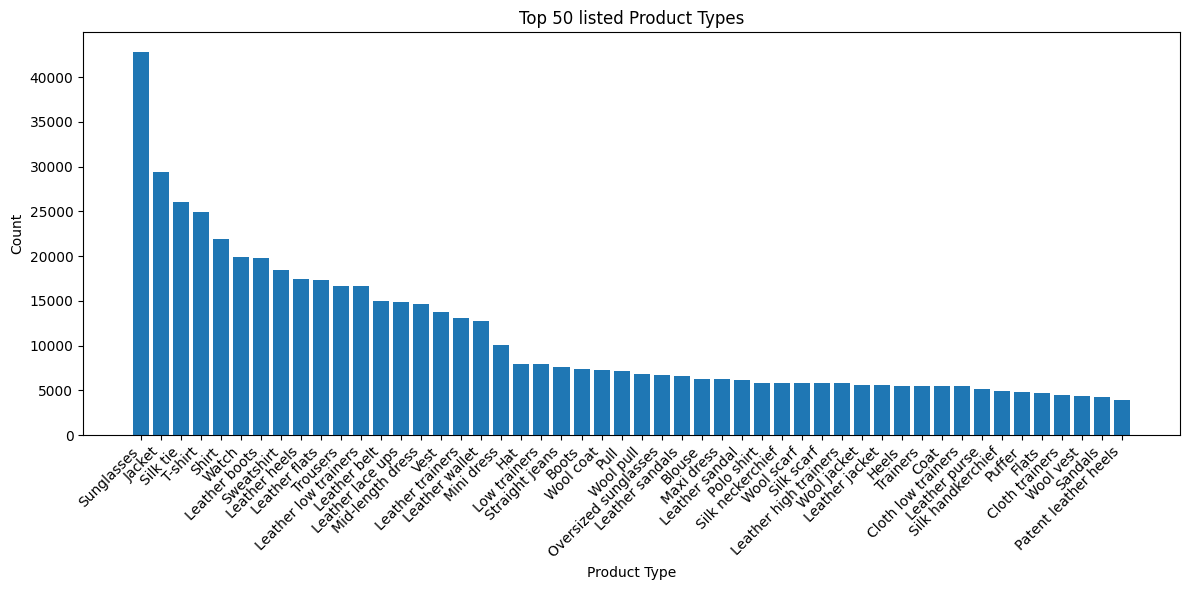

In [5]:
# bar chart group by product_type, top 100

import matplotlib.pyplot as plt

# Assuming 'product_type' is a column in your DataFrame 'df'
product_counts = df['product_type'].value_counts().nlargest(50)

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(product_counts.index, product_counts.values)
plt.xlabel("Product Type")
plt.ylabel("Count")
plt.title("Top 50 listed Product Types")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


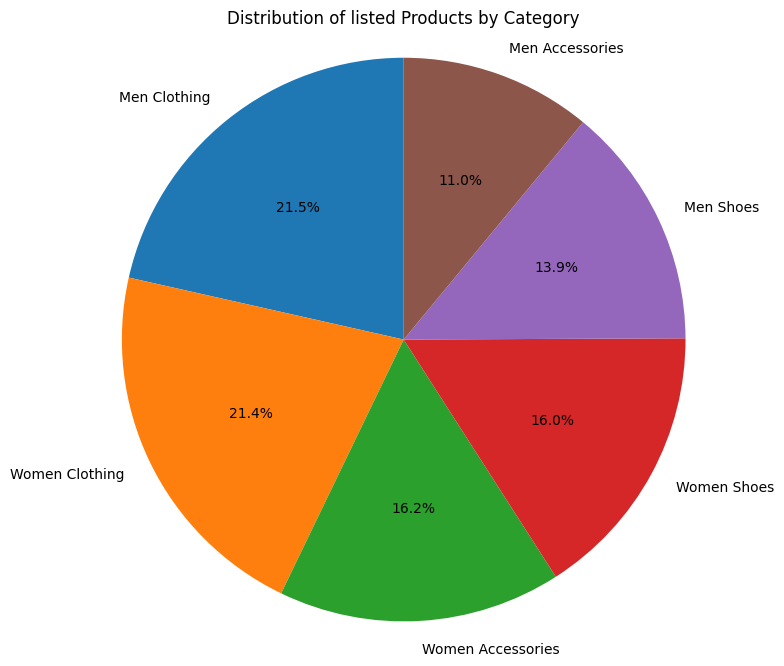

In [6]:
# pie chart by product_category

import matplotlib.pyplot as plt

# Assuming 'product_category' is a column in your DataFrame 'df'
product_category_counts = df['product_category'].value_counts()

plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(product_category_counts, labels=product_category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of listed Products by Category")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


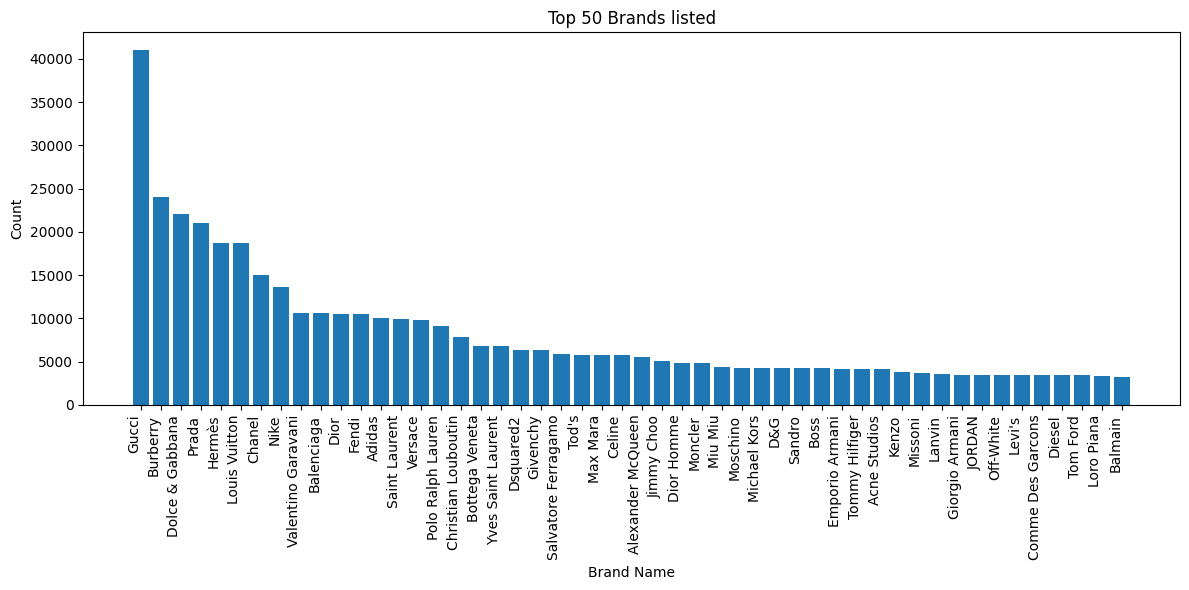

In [7]:
#  top 50 brand name

import pandas as pd
import matplotlib.pyplot as plt


# Group by brand name and get the top 50
top_50_brands = df['brand_name'].value_counts().nlargest(50)

# Create a bar plot for the top 50 brands
plt.figure(figsize=(12, 6))
plt.bar(top_50_brands.index, top_50_brands.values)
plt.xlabel("Brand Name")
plt.ylabel("Count")
plt.title("Top 50 Brands listed")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


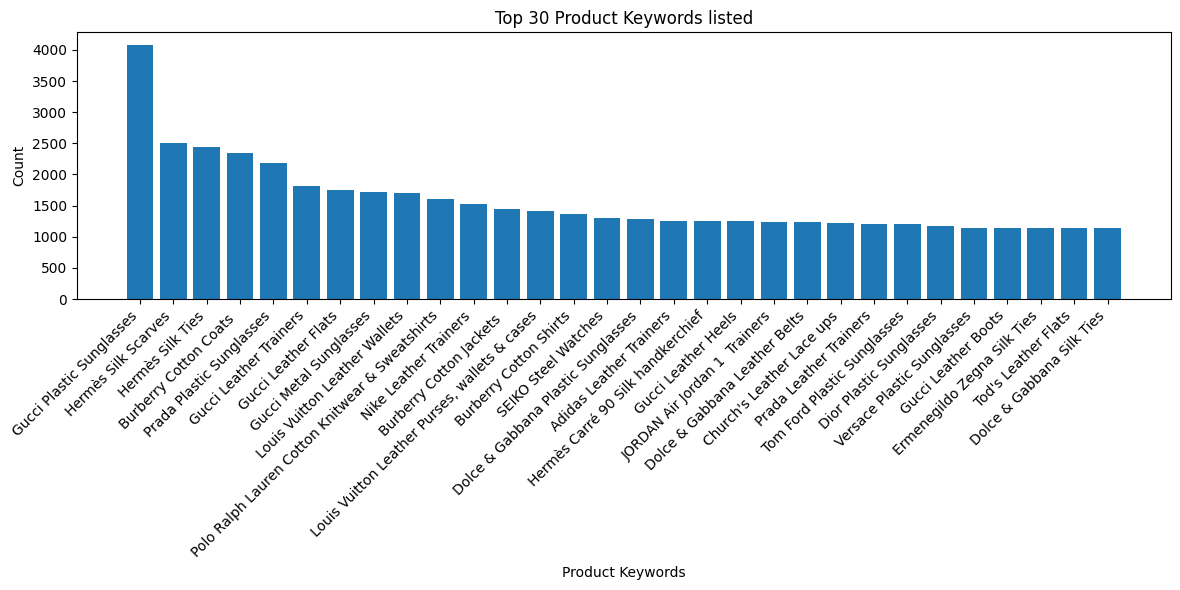

In [8]:
# top 30 product keywords

import matplotlib.pyplot as plt
# Assuming 'product_keywords' is a column in your DataFrame 'df'
# If not, replace 'product_keywords' with the actual column name containing keywords

product_keywords_counts = df['product_keywords'].value_counts().nlargest(30)

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(product_keywords_counts.index, product_keywords_counts.values)
plt.xlabel("Product Keywords")
plt.ylabel("Count")
plt.title("Top 30 Product Keywords listed")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


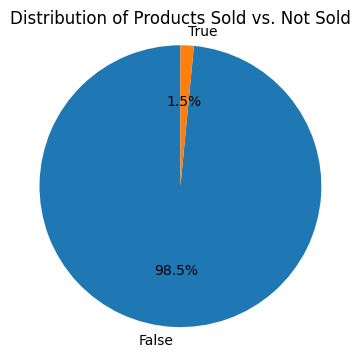

In [9]:
# pie chart of sold or not

import matplotlib.pyplot as plt
# Assuming 'sold' is a column indicating whether a product was sold (e.g., True/False, 1/0, 'Sold'/'Not Sold')
sold_counts = df['sold'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(sold_counts, labels=sold_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Products Sold vs. Not Sold")
plt.axis('equal')
plt.show()


Market Segmentation
1. analyzing the customer purchase preference through this website
2. extract useful information about the current state of the listing product


In [10]:
df_sold=df[df['sold']==True]
df_sold.head()

,product_type,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,sold,reserved,available,in_stock,should_be_gone,brand_id,brand_name,product_material,product_color,price_usd,seller_price,seller_earning,seller_badge
0,Wool mini skirt,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,True,False,True,False,False,117,Miu Miu,Wool,Grey,272.92,223.65,216.94,Common
9,Wool suit jacket,Dior Wool Jackets,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,True,False,True,False,False,10,Dior,Wool,Grey,437.97,358.91,312.25,Trusted
12,Silk maxi dress,La Perla Silk Dresses,Women,Women Clothing,All seasons,"Never worn, with tag",4.0,True,False,True,False,False,64,La Perla,Silk,Black,444.74,370.62,322.44,Common
19,Trousers,Gucci Cotton Trousers,Women,Women Clothing,All seasons,Very good condition,4.0,True,False,True,False,False,2,Gucci,Cotton,Beige,145.75,119.44,103.91,Common
53,Lingerie set,Agent Provocateur Polyamide Lingerie,Women,Women Clothing,All seasons,Very good condition,0.0,True,False,True,False,False,2658,Agent Provocateur,Polyamide,Black,55.37,46.14,42.40,Common


In [11]:
df_sold.shape

(13727, 20)

In [12]:
unique_categories = df_sold['product_category'].unique()
unique_categories

array(['Women Clothing', 'Men Clothing', 'Men Accessories',
       'Women Accessories', 'Men Shoes', 'Women Shoes'], dtype=object)

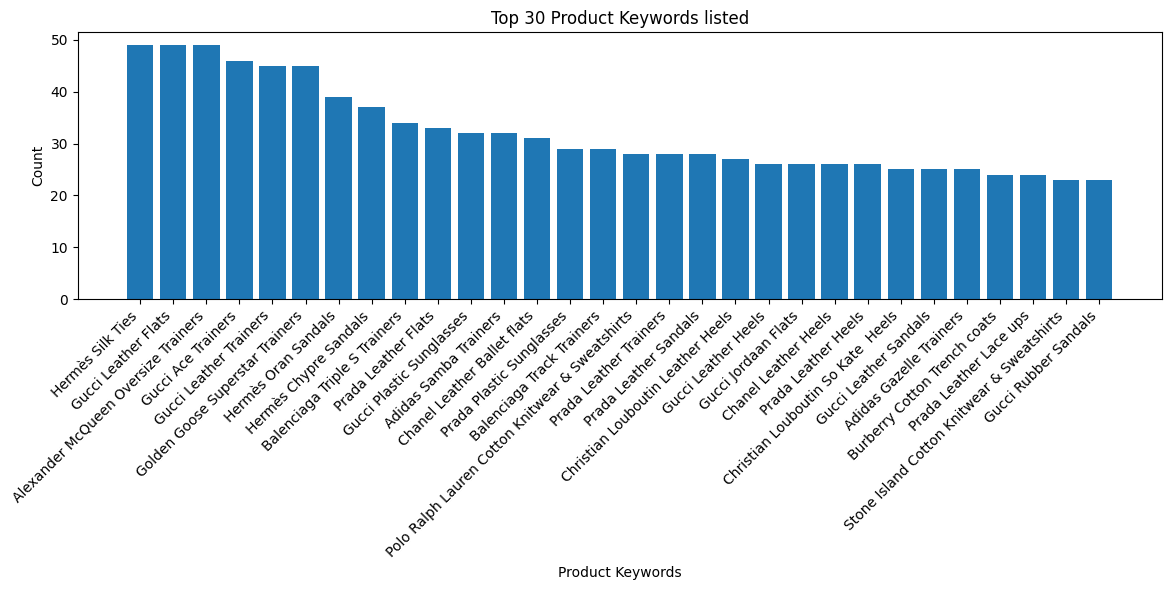

In [13]:
# prompt: bar chart top 30 product keywords

import matplotlib.pyplot as plt
# Assuming 'product_keywords' is a column in your DataFrame 'df'
# If not, replace 'product_keywords' with the actual column name containing keywords

product_keywords_counts = df_sold['product_keywords'].value_counts().nlargest(30)

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(product_keywords_counts.index, product_keywords_counts.values)
plt.xlabel("Product Keywords")
plt.ylabel("Count")
plt.title("Top 30 Product Keywords listed")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


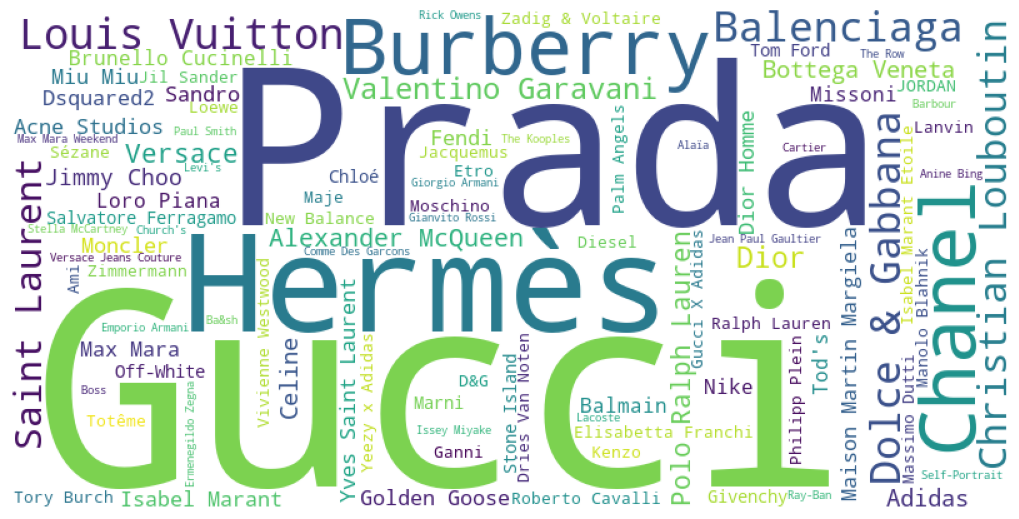

In [14]:
# prompt: word cloud of top 50 brand name of df_sold

!pip install wordcloud

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ... (Your existing code) ...

# Assuming df_sold is already defined as in your previous code

# Group by brand name and get the top 50
top_50_brands = df_sold['brand_name'].value_counts().nlargest(100)

# Create a dictionary from the top 50 brands and their counts
brand_counts_dict = dict(zip(top_50_brands.index, top_50_brands.values))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(brand_counts_dict)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


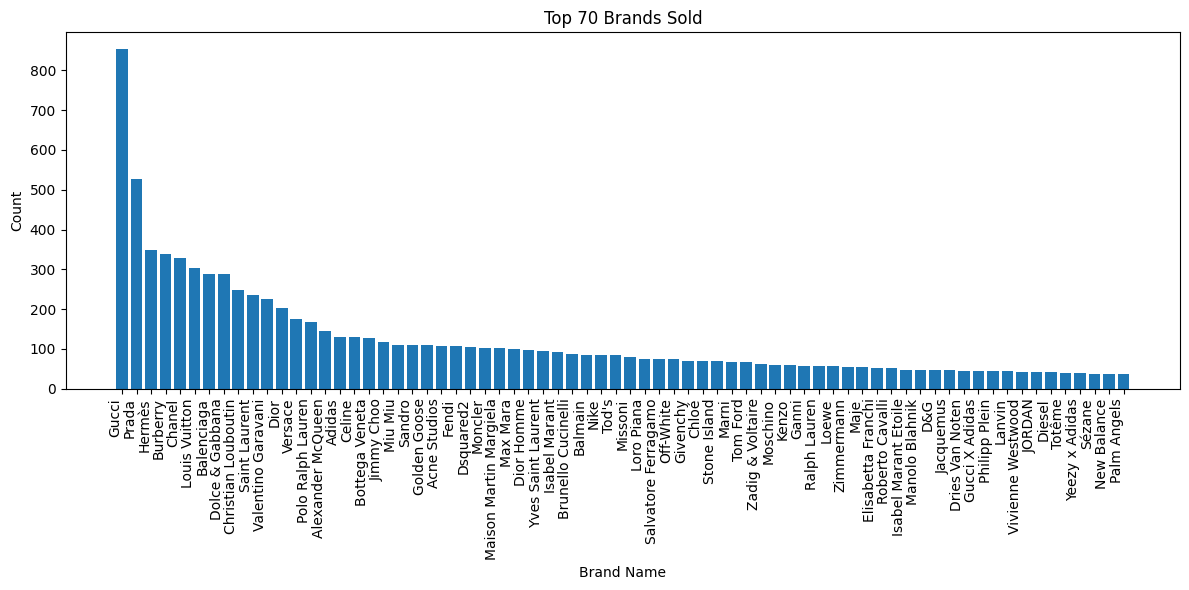

In [15]:
# prompt: bar chart on top 50 brand name of df_sold

import matplotlib.pyplot as plt
# Assuming df_sold is already defined as in your previous code

# Group by brand name and get the top 50
top_50_brands = df_sold['brand_name'].value_counts().nlargest(70)

# Create a bar plot for the top 50 brands
plt.figure(figsize=(12, 6))
plt.bar(top_50_brands.index, top_50_brands.values)
plt.xlabel("Brand Name")
plt.ylabel("Count")
plt.title("Top 70 Brands Sold")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


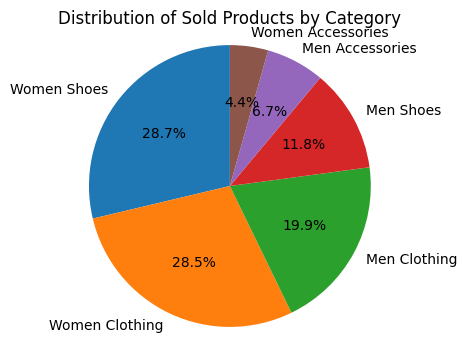

In [16]:
# pie chart on product category

import matplotlib.pyplot as plt
# Assuming df_sold is already defined as in your previous code

# Pie chart for product category on df_sold
product_category_counts_sold = df_sold['product_category'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(product_category_counts_sold, labels=product_category_counts_sold.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Sold Products by Category")
plt.axis('equal')
plt.show()




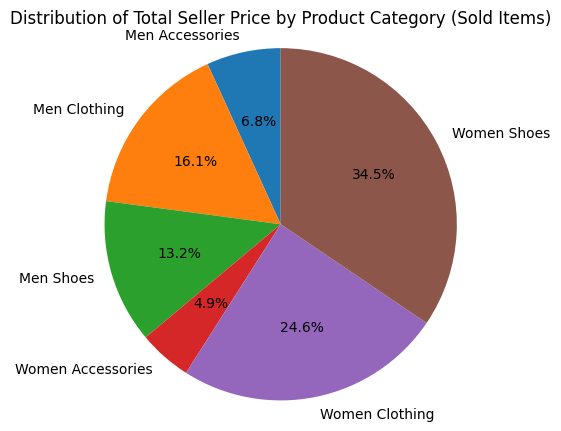

In [17]:
# pie chart on product category aggragated with seller_price

import matplotlib.pyplot as plt

# Assuming df_sold is already defined and contains the 'product_category' and 'seller_price' columns.

# Group by product category and sum the seller prices
category_prices = df_sold.groupby('product_category')['seller_price'].sum()

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(category_prices, labels=category_prices.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Total Seller Price by Product Category (Sold Items)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


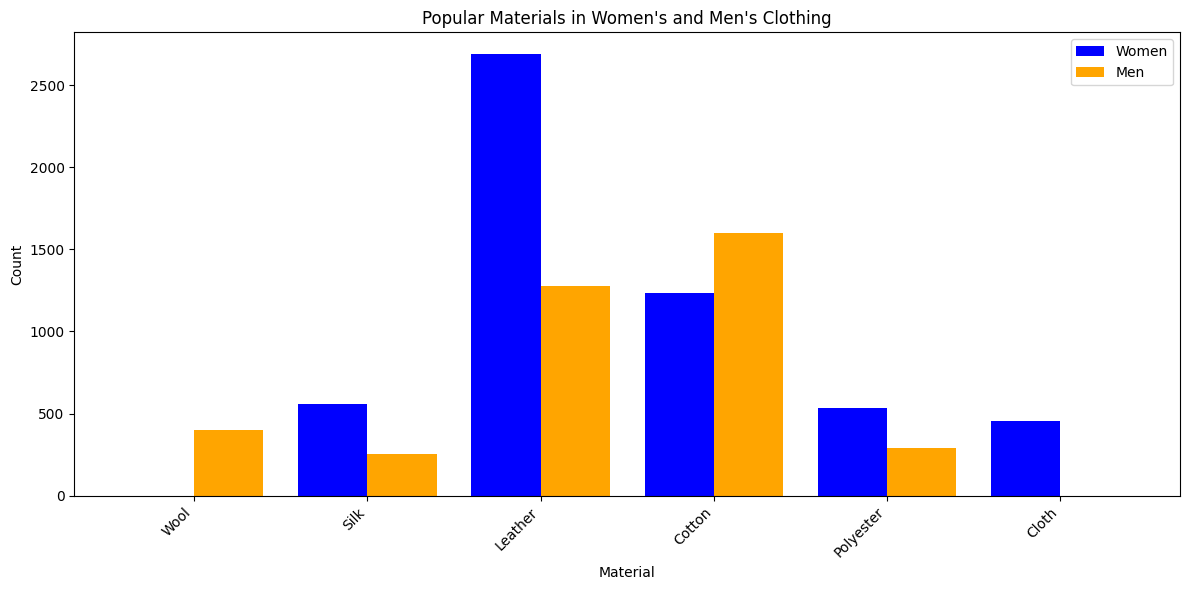

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_sold is your DataFrame and contains 'product_gender_target' and 'product_material'

# Filter for Women's and Men's clothing
womens_clothing = df_sold[df_sold['product_gender_target'] == 'Women']
mens_clothing = df_sold[df_sold['product_gender_target'] == 'Men']

# Count the occurrences of materials in women's and men's clothing
top_n = 5  # Top N materials
womens_materials = womens_clothing['product_material'].value_counts().nlargest(top_n)
mens_materials = mens_clothing['product_material'].value_counts().nlargest(top_n)

# Get the union of top materials for proper alignment
all_materials = list(set(womens_materials.index).union(set(mens_materials.index)))

# Get counts, setting to 0 if a material is missing in one category
womens_counts = [womens_materials.get(material, 0) for material in all_materials]
mens_counts = [mens_materials.get(material, 0) for material in all_materials]

# Bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.4
x = np.arange(len(all_materials))  # X locations for bars

plt.bar(x - bar_width/2, womens_counts, width=bar_width, label="Women", color="blue")
plt.bar(x + bar_width/2, mens_counts, width=bar_width, label="Men", color="orange")

# Labels and styling
plt.xlabel("Material")
plt.ylabel("Count")
plt.title("Popular Materials in Women's and Men's Clothing")
plt.xticks(x, all_materials, rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


In [19]:
df_sold.columns

Index(['product_type', 'product_keywords', 'product_gender_target',
       'product_category', 'product_season', 'product_condition',
       'product_like_count', 'sold', 'reserved', 'available', 'in_stock',
       'should_be_gone', 'brand_id', 'brand_name', 'product_material',
       'product_color', 'price_usd', 'seller_price', 'seller_earning',
       'seller_badge'],
      dtype='object')

In [20]:
## feature selection
df_sold = df_sold.drop(['reserved', 'available', 'in_stock', 'should_be_gone','sold'], axis=1)  # Drop single-value columns
df_sold = df_sold.drop(['seller_earning','brand_id','seller_badge'],axis=1)# drop inrrelavent columns

In [21]:
df_sold.head()

,product_type,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,brand_name,product_material,product_color,price_usd,seller_price
0,Wool mini skirt,Miu Miu Wool Skirts,Women,Women Clothing,Autumn / Winter,Never worn,34.0,Miu Miu,Wool,Grey,272.92,223.65
9,Wool suit jacket,Dior Wool Jackets,Women,Women Clothing,Autumn / Winter,Very good condition,2.0,Dior,Wool,Grey,437.97,358.91
12,Silk maxi dress,La Perla Silk Dresses,Women,Women Clothing,All seasons,"Never worn, with tag",4.0,La Perla,Silk,Black,444.74,370.62
19,Trousers,Gucci Cotton Trousers,Women,Women Clothing,All seasons,Very good condition,4.0,Gucci,Cotton,Beige,145.75,119.44
53,Lingerie set,Agent Provocateur Polyamide Lingerie,Women,Women Clothing,All seasons,Very good condition,0.0,Agent Provocateur,Polyamide,Black,55.37,46.14


In [22]:
for col in df_sold.columns:
    unique_values = df[col].unique()
    print(f"Column: {col}")
    print(f"Unique Values ({len(unique_values)}): {unique_values[:10]}")  # Show first 10 unique values
    print("-" * 50)

Column: product_type
Unique Values (10984): ['Wool mini skirt' 'Jacket' 'Wool coat' 'Mini skirt'
 'Vegan leather trousers' 'Mid-length dress' 'Silk trousers'
 'Silk mid-length dress' 'Suit jacket' 'Wool suit jacket']
--------------------------------------------------
Column: product_keywords
Unique Values (124611): ['Miu Miu Wool Skirts' 'Barbara Bui Cotton Jackets'
 'Comme Des Garcons Wool Coats' 'MSGM Polyester Skirts'
 'LVIR Vegan leather Trousers' 'See by Chloé Cotton - elasthane Dresses'
 'Just Cavalli Silk Trousers' 'J.Crew Silk Dresses'
 'Aquascutum Cotton Jackets' 'Dior Wool Jackets']
--------------------------------------------------
Column: product_gender_target
Unique Values (2): ['Women' 'Men']
--------------------------------------------------
Column: product_category
Unique Values (6): ['Women Clothing' 'Men Clothing' 'Men Accessories' 'Women Accessories'
 'Men Shoes' 'Women Shoes']
--------------------------------------------------
Column: product_season
Unique Values (3

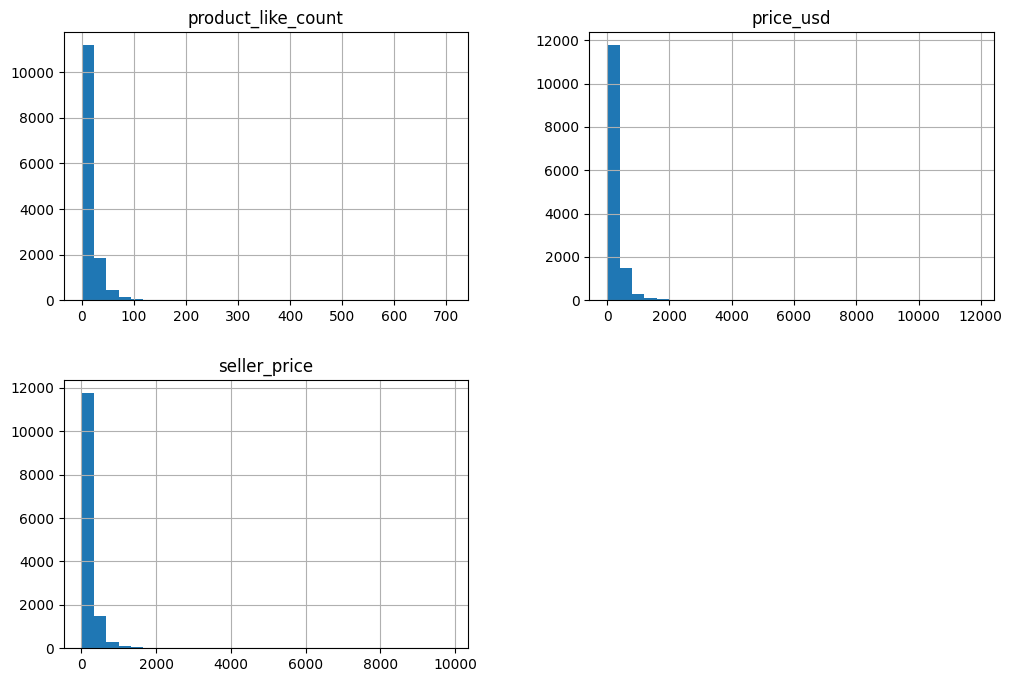

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Histogram for numerical features
df_sold.hist(figsize=(12,8), bins=30)
plt.xlim(0, 2000)
plt.show()

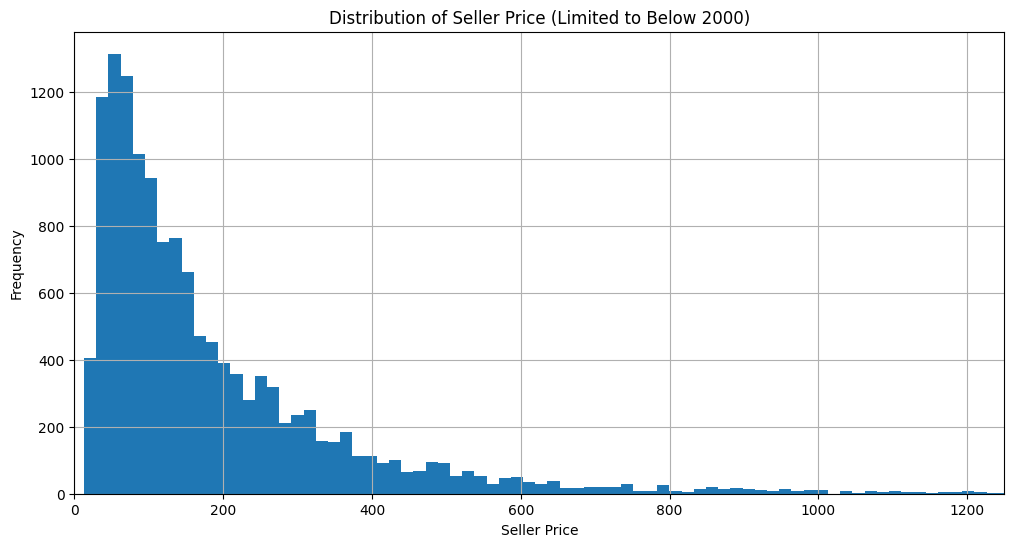

In [24]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.figure(figsize=(12,6))
df_sold["seller_price"].hist(bins=600)

# Set x-axis limit to only show prices below 2000
plt.xlim(0, 1250)

# Add labels and title
plt.xlabel("Seller Price")
plt.ylabel("Frequency")
plt.title("Distribution of Seller Price (Limited to Below 2000)")

plt.show()


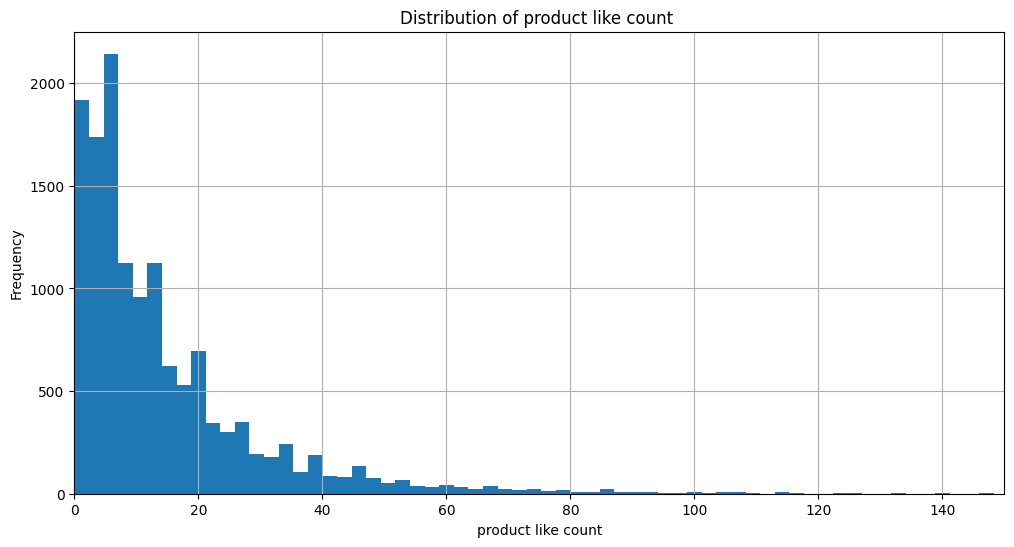

In [25]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.figure(figsize=(12,6))
df_sold["product_like_count"].hist(bins=300)

# Set x-axis limit to only show prices below 2000
plt.xlim(0, 150)

# Add labels and title
plt.xlabel("product like count")
plt.ylabel("Frequency")
plt.title("Distribution of product like count ")

plt.show()